In [ ]:
import pandas as pd

# Load the dataset with encoding fix
df = pd.read_csv("SampleSuperstore.csv", encoding='ISO-8859-1')

# Display the first 5 rows
df.head()


### Step 1: Loading the Data
I started by loading the dataset using pandas. I also made sure to use the correct encoding to avoid any weird character issues. Here's a quick look at the first few rows to understand the structure of the data.


In [7]:
# Dataset dimensions (rows, columns)
print("Shape of dataset:", df.shape)

# Column names and data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics:")
df.describe()



Shape of dataset: (2823, 25)

Data types:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Missing values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YE

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


### Step 2: Getting to Know the Data
Next, I checked the shape of the dataset, data types of each column, and looked for any missing values. I also ran a basic statistical summary to get a sense of things like average sales and quantity ordered.


In [8]:
# Drop columns we don't need for insights
df_cleaned = df.drop(columns=['ORDERNUMBER', 'ORDERLINENUMBER'])

# Add a new column: Estimated Profit
df_cleaned['EST_PROFIT'] = (df_cleaned['MSRP'] - df_cleaned['PRICEEACH']) * df_cleaned['QUANTITYORDERED']

# Check the first few rows of the cleaned dataset
df_cleaned.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,EST_PROFIT
0,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,-21.00
1,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,464.10
2,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,10.66
3,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,528.30
4,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,-245.00


### Step 3: Cleaning and Enhancing the Data
I removed a couple of columns that weren’t useful for the analysis. Then I created a new column called `EST_PROFIT` to estimate the profit made on each order. This will help later when comparing performance across different segments.


In [ ]:
%pip install matplotlib seaborn

### Step 4: Installing Visualization Libraries

Before moving on to visualizations, I made sure the necessary plotting libraries—Matplotlib and Seaborn—were installed. These will be used to create the charts and graphs in the upcoming steps.


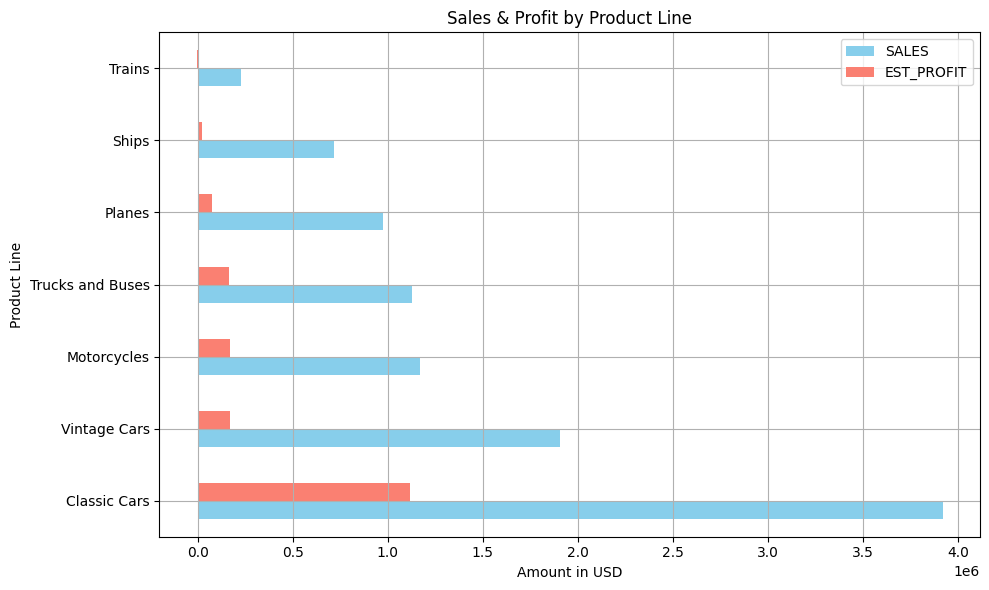

In [16]:
import matplotlib.pyplot as plt

category_summary = df_cleaned.groupby('PRODUCTLINE')[['SALES', 'EST_PROFIT']].sum().sort_values('SALES', ascending=False)
category_summary.plot(kind='barh', figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Sales & Profit by Product Line')
plt.xlabel('Amount in USD')
plt.ylabel('Product Line')
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 5: Sales & Profit by Product Line
I wanted to see which product categories are driving the most revenue and profit. This horizontal bar chart shows total sales and estimated profit for each product line. It's a great way to spot top-performing categories.

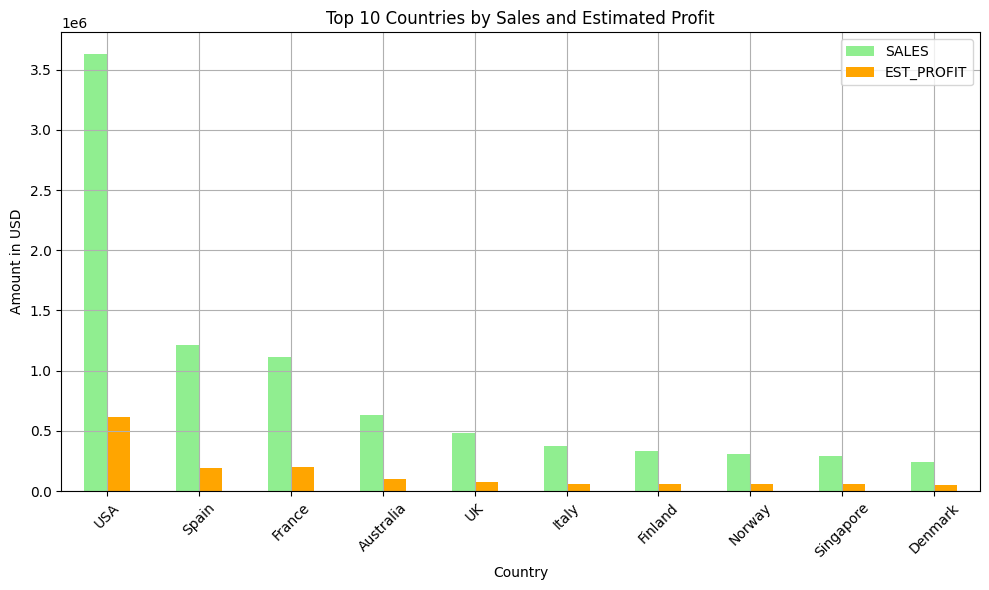

In [17]:
import matplotlib.pyplot as plt

# Top 10 countries by sales
country_summary = df_cleaned.groupby('COUNTRY')[['SALES', 'EST_PROFIT']].sum().sort_values('SALES', ascending=False).head(10)

# Plot
country_summary.plot(kind='bar', figsize=(10,6), color=['lightgreen', 'orange'])
plt.title('Top 10 Countries by Sales and Estimated Profit')
plt.ylabel('Amount in USD')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 6: Country-Level Sales and Profit
This chart looks at the top 10 countries in terms of both sales and estimated profit. It helps identify which regions are most valuable to the business and where there might be growth opportunities.


In [18]:
# Create a unique order ID
df_cleaned['ORDER_ID'] = df_cleaned['ORDERDATE'] + " - " + df_cleaned['CUSTOMERNAME']

# Group by unique orders
order_summary = df_cleaned.groupby('ORDER_ID').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
})

# Calculate Average Order Value
order_summary['AVG_ORDER_VALUE'] = order_summary['SALES'] / order_summary['QUANTITYORDERED']

# Display summary statistics
order_summary.describe()


,SALES,QUANTITYORDERED,AVG_ORDER_VALUE
count,306.000000,306.000000,306.000000
mean,32786.368791,323.748366,101.336552
std,17678.913387,176.169699,19.045725
min,553.950000,15.000000,36.930000
25%,17734.102500,172.500000,88.884036
50%,33973.825000,317.500000,100.972153
75%,46855.347500,466.000000,111.627169
max,77809.370000,717.000000,187.480769


### Step 7: Understanding Customer Behavior
To analyze customer-level behavior, I created a unique order ID by combining the order date with customer name. I then calculated total sales and quantity per order and used these to compute the average order value. This gives insights into how much customers typically spend per order.
